<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png" 
     width="200px"
     height="auto"/>
</p>

# Online Purchasing Consumer Behavior Analysis

The data is in `dat/online_shoppers_intention.csv.gz`, from [Online Shoppers Purchasing Intention Dataset](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset). The dataset consists of feature vectors belonging to 12,330 sessions, each session belongs to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # allow multiple outputs in a cell

import warnings
warnings.filterwarnings("ignore")

## **Task 1: Classification (50 points)**
Build a predictive classification model using data entries corresponding to the months of June—December as training set, and those corresponding to February—March as test set. 

More specifically,
1. Fit a logistic regression and at least one other classification model. Find and explain important features.
2. Report and interpret the most meaningful classifications metrics
3. Show and explain the hyper-parameter fitting process.

### Data Overview

In [2]:
import pandas as pd
import numpy as np


In [3]:
filepath = "dat/online_shoppers_intention.csv.gz"
data = pd.read_csv(filepath)

In [4]:
data.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
677,1,19.666667,0,0.0,14,512.111111,0.028571,0.030000,0.0,0.0,Mar,3,2,3,9,Returning_Visitor,True,False
6443,1,68.600000,1,29.2,97,4318.668082,0.002520,0.013784,0.0,0.0,Jul,2,4,2,2,Returning_Visitor,True,False
827,0,0.000000,0,0.0,13,123.000000,0.000000,0.020833,0.0,0.0,Mar,2,2,1,3,Returning_Visitor,False,False
12126,0,0.000000,0,0.0,18,636.500000,0.000000,0.027778,0.0,0.0,Dec,2,2,3,2,Returning_Visitor,False,False
7184,0,0.000000,0,0.0,11,631.400000,0.054545,0.048485,0.0,0.0,Aug,1,1,1,3,Returning_Visitor,False,False


In [5]:
print("Dataset has {} samples and {} features".\
                  format(data.shape[0], data.shape[1]-1))

Dataset has 12330 samples and 17 features


In [6]:
print("column data types: ")
print("----")

data.dtypes

column data types: 
----


Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [7]:
print("number of unique values per column: ")
print("----" )

data.nunique()

number of unique values per column: 
----


Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [8]:
print("dataset has no missing values")
print("-----")

data.isna().sum()

dataset has no missing values
-----


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [9]:
print("Descriptive stats:")
print("----")

data.describe().T

Descriptive stats:
----


,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


### Split into train and test dataset 
* months of June—December as training set, and those corresponding to February—March as test set.
* Splitting  helps prevent "leaking" information about the testing data to the model, which in turns also prevents "overfitting"

In [10]:
month = data.Month.unique()

In [11]:
months_ = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June',\
           'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec']

month_str2num = {s: i+1 for i, s in enumerate(months_)}

data["Month"] = data["Month"].replace(month_str2num)

In [12]:

print("before:  ", month)
print("after:  ", list(data.Month.unique()))

before:   ['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']
after:   [2, 3, 5, 10, 6, 7, 8, 11, 9, 12]


In [13]:

train_df = data[data.Month >= 6]
test_df  = data[data.Month.isin([2,3])]

In [14]:
print('Original set  ---> ', data.shape,
      '\nTraining set  ---> ', train_df.shape,
      '\nTesting set   ---> ',train_df.shape)

Original set  --->  (12330, 18) 
Training set  --->  (6875, 18) 
Testing set   --->  (6875, 18)


### Exploratory Data Analysis

In [15]:
train_df.nunique()

Administrative               27
Administrative_Duration    2504
Informational                14
Informational_Duration      964
ProductRelated              302
ProductRelated_Duration    6046
BounceRates                1438
ExitRates                  3268
PageValues                 1673
SpecialDay                    1
Month                         7
OperatingSystems              8
Browser                      12
Region                        9
TrafficType                  15
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

* `SpecialDay` has only one unique value, offering no information. So we can safely ignore it for now
* `Revenue` is a binary feature - - > should encode to its equivalent numerical repr. `[0, 1]`

In [16]:
rev = train_df["Revenue"].unique()
rev

array([False,  True])

In [17]:

train_df["Revenue"] = train_df["Revenue"].astype(int)

print("before  :", list(rev))
print("after  :", list(train_df.Revenue.unique()))

before  : [False, True]
after  : [0, 1]


In [18]:
train_df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                        int64
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                      int64
dtype: object

In [19]:
categoricalFeatures = ["OperatingSystems",	"Browser", "Region", \
                              "TrafficType", "VisitorType", "Weekend"]

In [20]:
numericalFeatures = [name for name in train_df.columns \
                        if (name != "Revenue") &  (name not in categoricalFeatures)
                    ]

numericalFeatures

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'Month']

                                 Numeric Features Distribution                                  


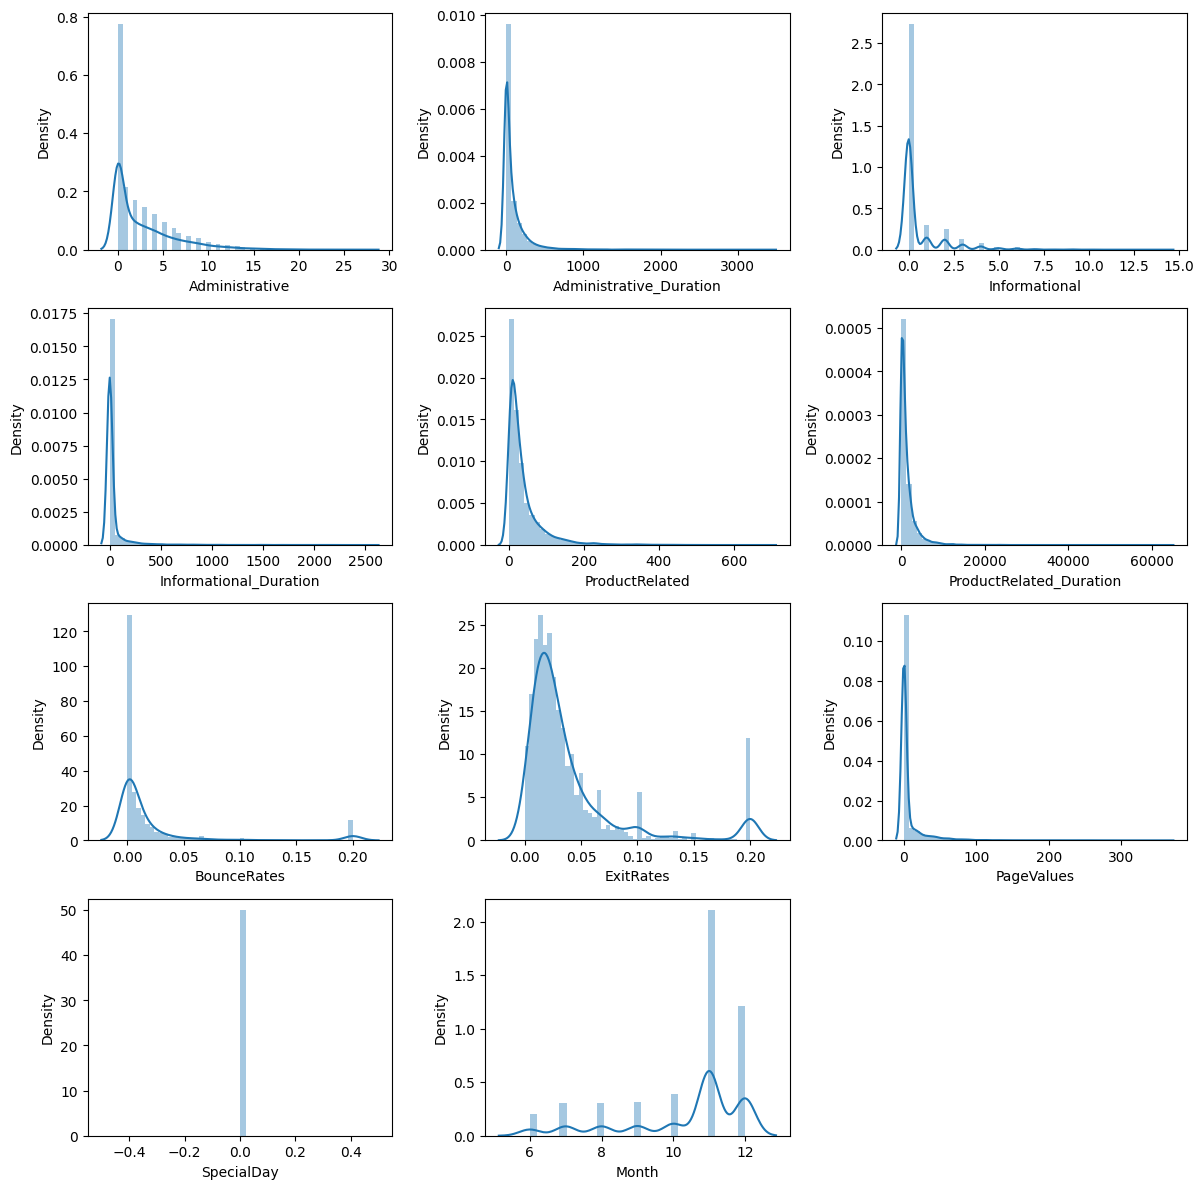

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

print('\033[1mNumeric Features Distribution'.center(100))

figsize = (12, 12) # (10,6)

n=len(numericalFeatures)

# histogram
plt.figure(figsize=figsize)
for i in range(len(numericalFeatures)):
    plt.subplot(4, 3 ,i+1)
    sns.distplot(train_df[numericalFeatures[i]]) 
plt.tight_layout();


 
- `BounceRate` and `ExitRate` are the only ones with a normal distribution, and values in the range [0,1]. Definitely have to normalize to maintian uniformity especially for the duration columns 

                               Visualising Categorical Features:                                


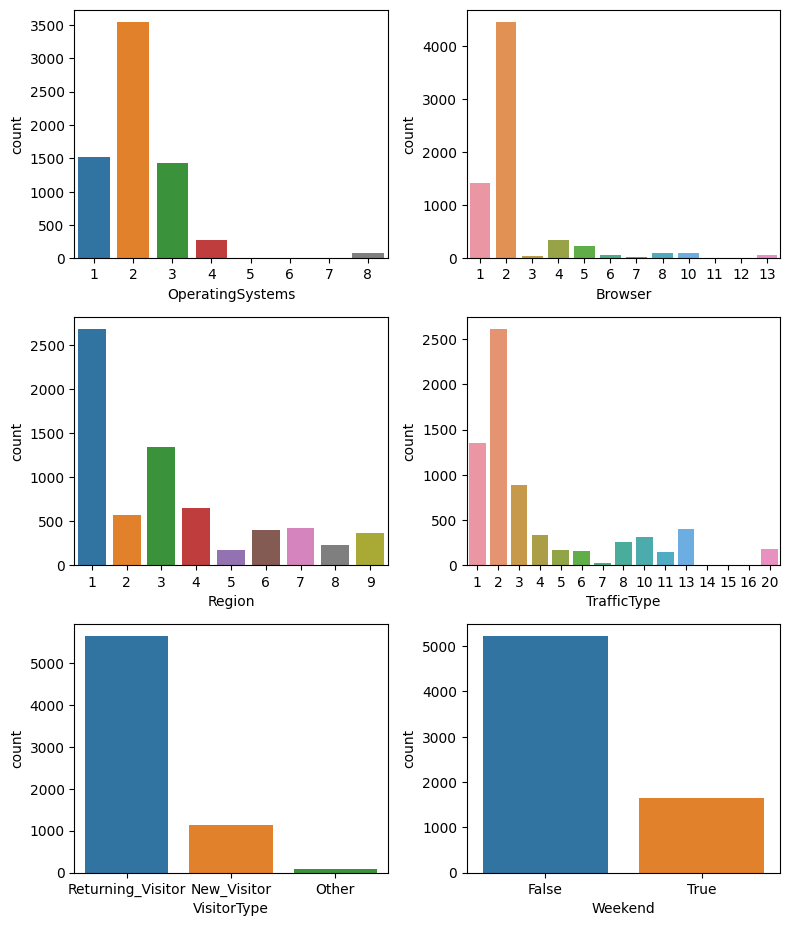

In [22]:
print('\033[1mVisualising Categorical Features:'.center(100))

plt.figure(figsize=(8, 12))

for i in range(len(categoricalFeatures)):
    plt.subplot(4, 2, i+1)
    sns.countplot(train_df[categoricalFeatures[i]])
plt.tight_layout();

In [23]:
print("Row distribution (%) of some categorical features: \n" )
for col in ["VisitorType", "Weekend", "Revenue"]:
    print(train_df[col].value_counts()/len(train_df))
    print("\n")

Row distribution (%) of some categorical features: 

Returning_Visitor    0.821527
New_Visitor          0.166109
Other                0.012364
Name: VisitorType, dtype: float64


False    0.760873
True     0.239127
Name: Weekend, dtype: float64


0    0.803927
1    0.196073
Name: Revenue, dtype: float64




In [24]:
# split features from labels

train_features = train_df.drop("Revenue", axis=1)
train_labels= train_df["Revenue"]

test_features = test_df.drop("Revenue", axis=1)
test_labels  = test_df["Revenue"]

train_features.shape, test_features.shape


((6875, 17), (2091, 17))

### Feature Engineering

* As observed earlier, a majority of the numerical features dont have a normal distribution and should therefore be normalized, i.e 
scaled to be of a similar range using sckitik learn's `MinMaxScaler` 
* Similarly, some of the categorical features  need to be standardized using `OneHotEncoder`

In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

def normalizer_encoder_func(train_features, test_features):
    """Function that handles the Normalization and Hot encoding """
    
    scaler = MinMaxScaler() 
    x_train_num = scaler.fit_transform(train_features[numericalFeatures]) 
    x_test_num = scaler.transform(test_features[numericalFeatures]) 
    
    
    ohe = OneHotEncoder(handle_unknown='ignore',sparse = False)
    x_train_cat = ohe.fit_transform(train_features[categoricalFeatures])
    x_test_cat = ohe.transform(test_features[categoricalFeatures])
    new_cat_features = list(ohe.get_feature_names_out(categoricalFeatures))
    
    
    X_train_transformed = np.hstack([x_train_num, x_train_cat])
    X_test_transformed = np.hstack([x_test_num, x_test_cat])

    return  new_cat_features, X_train_transformed, X_test_transformed


In [26]:

new_cat_features, X_train, X_test  = normalizer_encoder_func(train_features, test_features)

Xtrain_df = pd.DataFrame(X_train, columns=numericalFeatures + new_cat_features )
Xtest_df  = pd.DataFrame(X_test, columns=numericalFeatures + new_cat_features )

In [27]:

print("original train dataset ---> :", train_df.shape)
print("original test dataset  --->:",  test_df.shape)

print("\n")
      
print("transformed train dataset  ---> :", Xtrain_df.shape)
print("transformed test dataset  --->:",   Xtest_df.shape)

original train dataset ---> : (6875, 18)
original test dataset  --->: (2091, 18)


transformed train dataset  ---> : (6875, 60)
transformed test dataset  --->: (2091, 60)


In [28]:

X_train_df = pd.concat([Xtrain_df, train_labels.reset_index(drop=True)],axis=1)
#X_test_df = pd.concat([Xtest_df, test_labels.reset_index(drop=True)],axis=1)

X_train_df.shape

(6875, 61)

Now that the data has been standardized, check for highly correlated features.

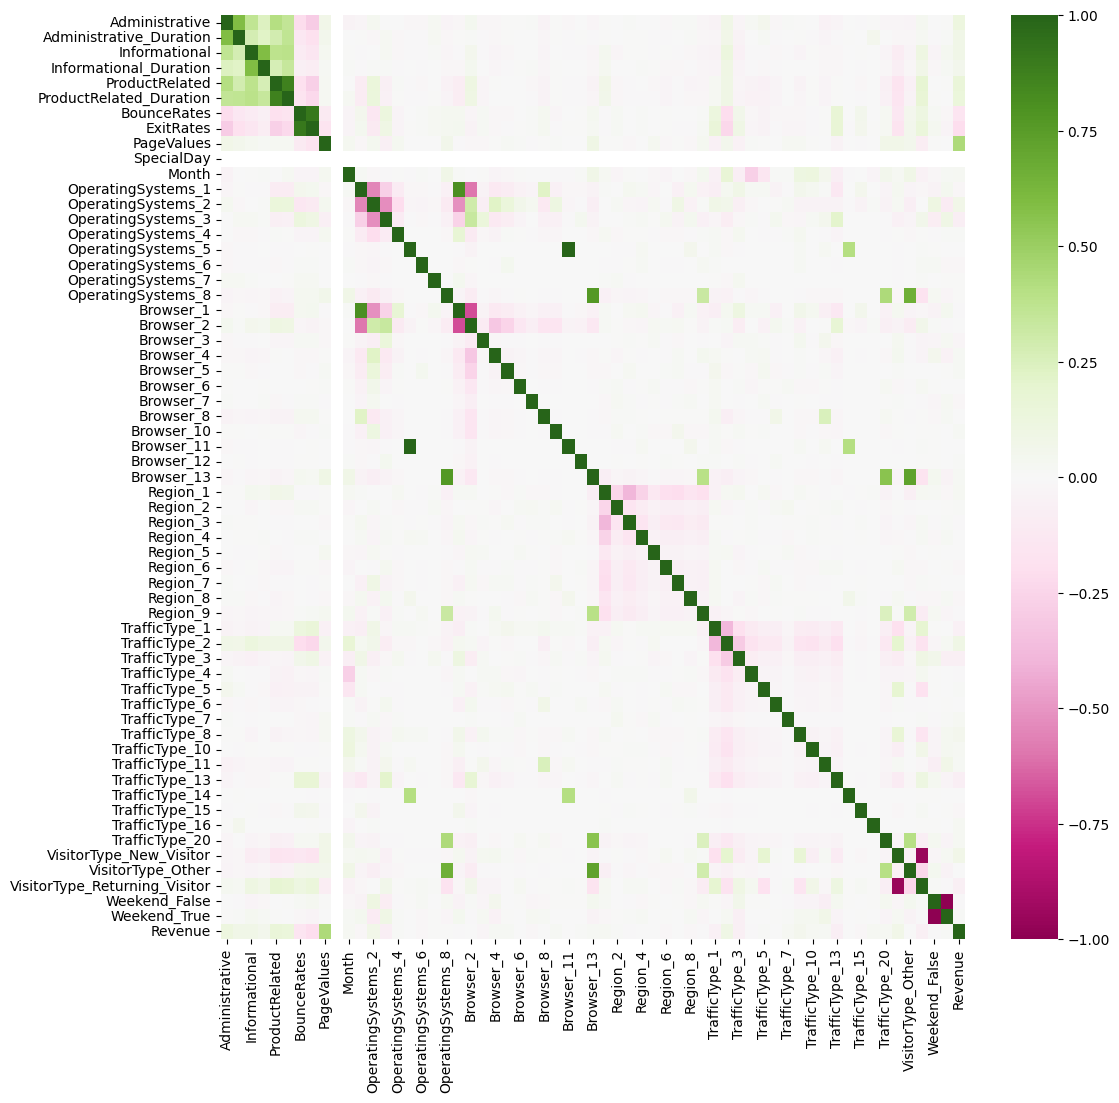

In [29]:
plt.figure(figsize=(12, 12))

cor = X_train_df.corr() 
sns.heatmap(cor, vmin=-1, vmax=1, cmap="PiYG");

In [30]:
cor

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True,Revenue
Administrative,1.000000,0.593727,0.361125,0.236805,0.410491,0.353213,-0.213037,-0.295068,0.076138,NaN,...,-0.005601,-0.008071,0.004567,-0.028723,-0.026815,-0.037161,0.036788,-0.006830,0.006830,0.122452
Administrative_Duration,0.593727,1.000000,0.276923,0.226562,0.285605,0.359699,-0.137100,-0.194436,0.055414,NaN,...,0.000265,-0.001496,0.047722,-0.006990,-0.019386,-0.016961,0.023737,-0.009085,0.009085,0.082261
Informational,0.361125,0.276923,1.000000,0.591669,0.378943,0.383164,-0.107670,-0.147580,0.031478,NaN,...,-0.005213,0.006386,-0.005213,-0.034151,-0.098010,-0.033562,0.104949,-0.035743,0.035743,0.078684
Informational_Duration,0.236805,0.226562,0.591669,1.000000,0.269143,0.343076,-0.066199,-0.092367,0.019932,NaN,...,-0.003090,-0.009192,-0.003090,-0.017559,-0.071806,-0.020284,0.075648,-0.021766,0.021766,0.058077
ProductRelated,0.410491,0.285605,0.378943,0.269143,1.000000,0.868401,-0.191273,-0.273466,0.028380,NaN,...,-0.007403,-0.018107,-0.004870,-0.068245,-0.171743,-0.054851,0.182759,-0.001935,0.001935,0.155923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VisitorType_Other,-0.037161,-0.016961,-0.033562,-0.020284,-0.054851,-0.042822,0.048377,0.060828,0.062054,NaN,...,-0.001349,-0.004270,-0.001349,0.404387,-0.049936,1.000000,-0.240049,0.041122,-0.041122,-0.002209
VisitorType_Returning_Visitor,0.036788,0.023737,0.104949,0.075648,0.182759,0.169222,0.117058,0.145308,-0.093073,NaN,...,0.005622,0.017789,0.005622,-0.084469,-0.957563,-0.240049,1.000000,0.014775,-0.014775,-0.070246
Weekend_False,-0.006830,-0.009085,-0.035743,-0.021766,-0.001935,0.005673,0.022237,0.035161,0.005634,NaN,...,0.006762,-0.005447,0.006762,0.038434,-0.027411,0.041122,0.014775,1.000000,-1.000000,-0.010012
Weekend_True,0.006830,0.009085,0.035743,0.021766,0.001935,-0.005673,-0.022237,-0.035161,-0.005634,NaN,...,-0.006762,0.005447,-0.006762,-0.038434,0.027411,-0.041122,-0.014775,-1.000000,1.000000,0.010012


* Drop the features with high correlation.We'll do this by looking at each pair of features, and if they are highly correlated (at least 0.8), we won't include the second feature in the pair. 
* Store the remaining set of features (the ones you didn't drop) in dataframe `train_df_reduced`

In [31]:
cor.shape

(61, 61)

In [32]:
import numpy as np

keep_columns = np.full(cor.shape[0], True)
for i in range(cor.shape[0] - 1):
    for j in range(i + 1, cor.shape[0] - 1):
        if (np.abs(cor.iloc[i, j]) >= 0.8):
            keep_columns[j] = False
            
            
selected_columns = X_train_df.columns[keep_columns]
selected_features = list(selected_columns[:-1])
selected_features.remove('SpecialDay')  # remove column as it has one unique value

len(selected_features)

53

In [33]:

X_train_reduced = Xtrain_df[selected_features]

X_test_reduced = Xtest_df[selected_features] 


X_train_reduced.shape,  X_test_reduced.shape


((6875, 53), (2091, 53))

In [34]:
set(X_train_df.columns) - set(X_train_reduced)

{'Browser_1',
 'Browser_11',
 'ExitRates',
 'ProductRelated_Duration',
 'Revenue',
 'SpecialDay',
 'VisitorType_Returning_Visitor',
 'Weekend_True'}


 ** `Browser_1, Browser_11, ExitRates, ProductRelated_Duration, VisitorType_Returning_Visitor,
 Weekend_True` are the highly correlated features

### Classification1:  Logistic Regression 

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [36]:
y_train = train_labels
y_test = test_labels

In [37]:

%time

lr_model = LogisticRegression(class_weight='balanced') 
lr_model.fit(X_train_reduced, y_train)

lr_pred = lr_model.predict(X_test_reduced) 

print(classification_report(y_test, lr_pred))


CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.48 µs


LogisticRegression(class_weight='balanced')

              precision    recall  f1-score   support

       False       0.99      0.85      0.91      1896
        True       0.38      0.92      0.54       195

    accuracy                           0.85      2091
   macro avg       0.69      0.88      0.73      2091
weighted avg       0.93      0.85      0.88      2091



### Classification2:  Support Vector Machine (SVM)

In [38]:
from sklearn.svm import LinearSVC

%time
svm_model = LinearSVC(class_weight='balanced') 
svm_model.fit(X_train_reduced,  y_train)

svm_pred = svm_model.predict(X_test_reduced)

print(classification_report(y_test, svm_pred))


CPU times: user 23 µs, sys: 7 µs, total: 30 µs
Wall time: 6.91 µs


LinearSVC(class_weight='balanced')

              precision    recall  f1-score   support

       False       0.99      0.91      0.94      1896
        True       0.49      0.88      0.63       195

    accuracy                           0.90      2091
   macro avg       0.74      0.89      0.79      2091
weighted avg       0.94      0.90      0.91      2091



****Discussion on Peformance metrics**:  
- The two models seem to be  relatively comparable in performance as demonstrated in the output although Linear model 
has higher recall (91%) meaning that it's better at predicting actual positives > SVM Model (81%)
- On other hand, SVM has better accuracy (90%) > Linear (85%). Though other metrics should take precedence given that the dataset is imbalanced.

## **Task 2. Customer Segmentation (25 points)**

Generate user-behavior clusters based on the purchasing behavior data for the complete dataset.

1. How many clusters do you see? What are the significant differences between the various clusters in terms of the size of the clusters and purchase ratio. Perform as detailed analysis of the clusters.
2. Return plots and cluster images generated for the data.
3. Perform a detailed analysis for each cluster corresponding to the variations in features and identify some behaviors corresponding to each particular cluster (e.g., which cluster represent new shoppers vs. brand conscious shoppers etc.).

### PCA for Dimensionality reduction


In [39]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [40]:
X = data.drop("Revenue", axis=1)
y = data["Revenue"]

X.shape

(12330, 17)

In [41]:
from sklearn.decomposition import PCA

# normalize data before applying PCA- 
def preprocess(X):
    scaler = MinMaxScaler() 
    X_num = scaler.fit_transform(X[numericalFeatures]) 
    
    ohe = OneHotEncoder(handle_unknown='ignore',sparse = False)
    X_cat = ohe.fit_transform(X[categoricalFeatures])
    new_cat_features = list(ohe.get_feature_names_out(categoricalFeatures))
    
    X_transformed = np.hstack([X_num, X_cat])
    
    
    return  new_cat_features, X_transformed


In [42]:
new_cat_features, X_transformed  = preprocess(X)
X_transformed_df = pd.DataFrame(X_transformed, columns=numericalFeatures+new_cat_features)

X_transformed_df.shape

(12330, 66)

In [43]:

pca = PCA(n_components=10, random_state=42, whiten=True)
X_reduced = pca.fit_transform(X_transformed_df)

In [44]:
X_reduced.shape   # reduced from 66 - > 10 features

(12330, 10)

In [45]:
print("Explained variation per principal component:", "\n")
print(pca.explained_variance_ratio_)

Explained variation per principal component: 

[0.14837506 0.1010782  0.09423119 0.07949423 0.07784569 0.05413959
 0.0485004  0.0403856  0.03239755 0.03138227]


### KMeans Clustering  on the reduced data- 

In [46]:
from sklearn.cluster import KMeans


def visualize_elbow(X, ks):
    fig, ax = plt.subplots()
    inertias = []
    for k in ks:
        my_cluster = KMeans(init="k-means++", n_clusters=k, random_state=10).fit(X) 
        inertias.append(my_cluster.inertia_) 
    plt.plot(ks, inertias)
    plt.xticks(ks)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow plot')

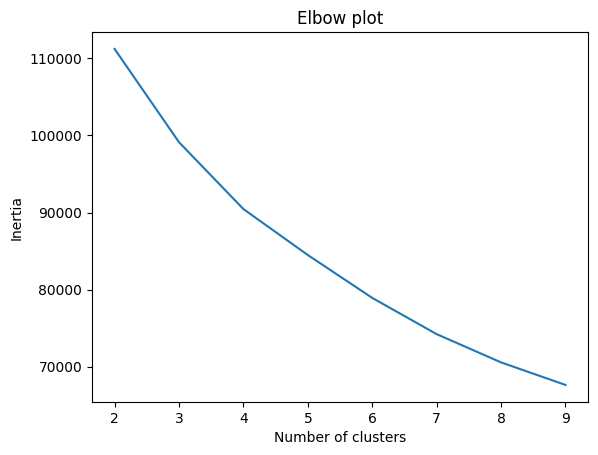

In [47]:
visualize_elbow(X_reduced, ks=range(2,10))

** **Discussion:** 
- A big disadvantage of elbow plot is that it's hard to determine the optimal value for k when there is no obvious "elbow" formation in the plot
 as in this case, though I would say `k=4` and `k=5` seems like decent choices. I will use  another method `silhoutte score` to visualize k-means for k

For n_clusters = 2 The average silhouette_score is : 0.1682318743082794
For n_clusters = 3 The average silhouette_score is : 0.14968457240365513
For n_clusters = 4 The average silhouette_score is : 0.1797106216788446
For n_clusters = 5 The average silhouette_score is : 0.17083124082447565
For n_clusters = 6 The average silhouette_score is : 0.15913327792848492
For n_clusters = 7 The average silhouette_score is : 0.1624389991045095
For n_clusters = 8 The average silhouette_score is : 0.1512027089947077


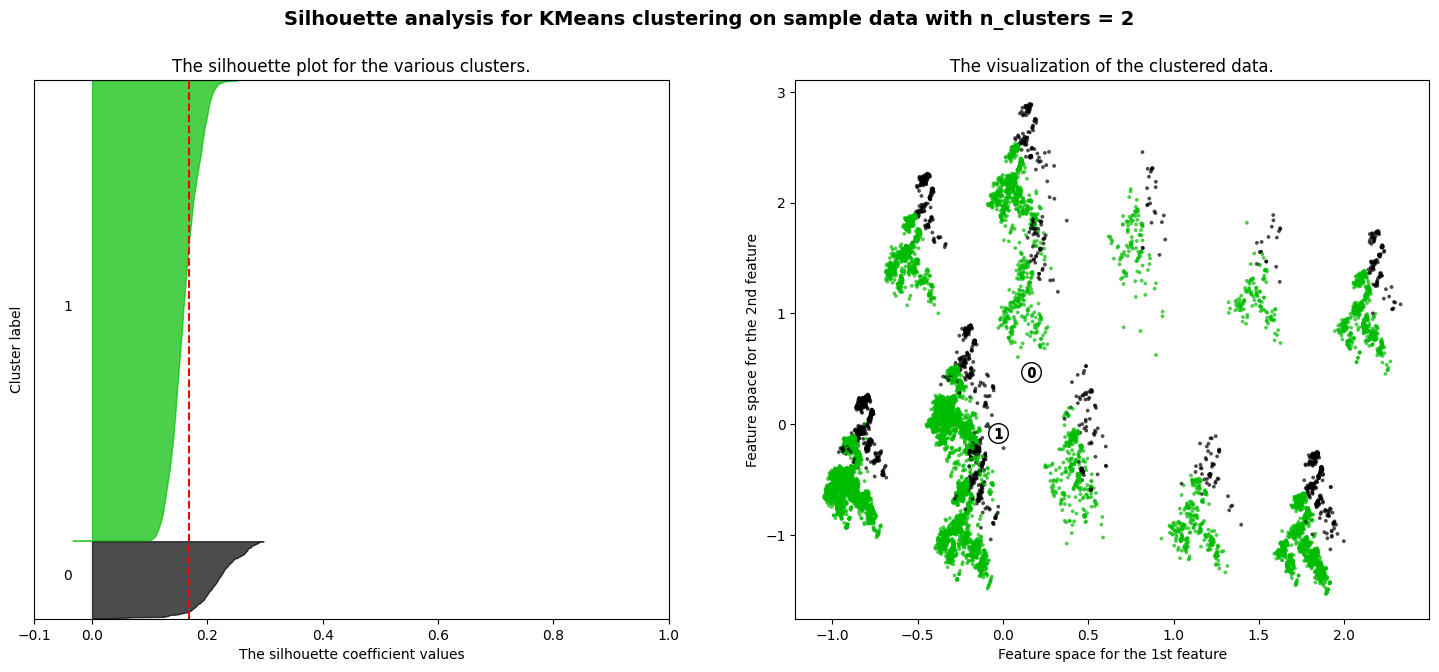

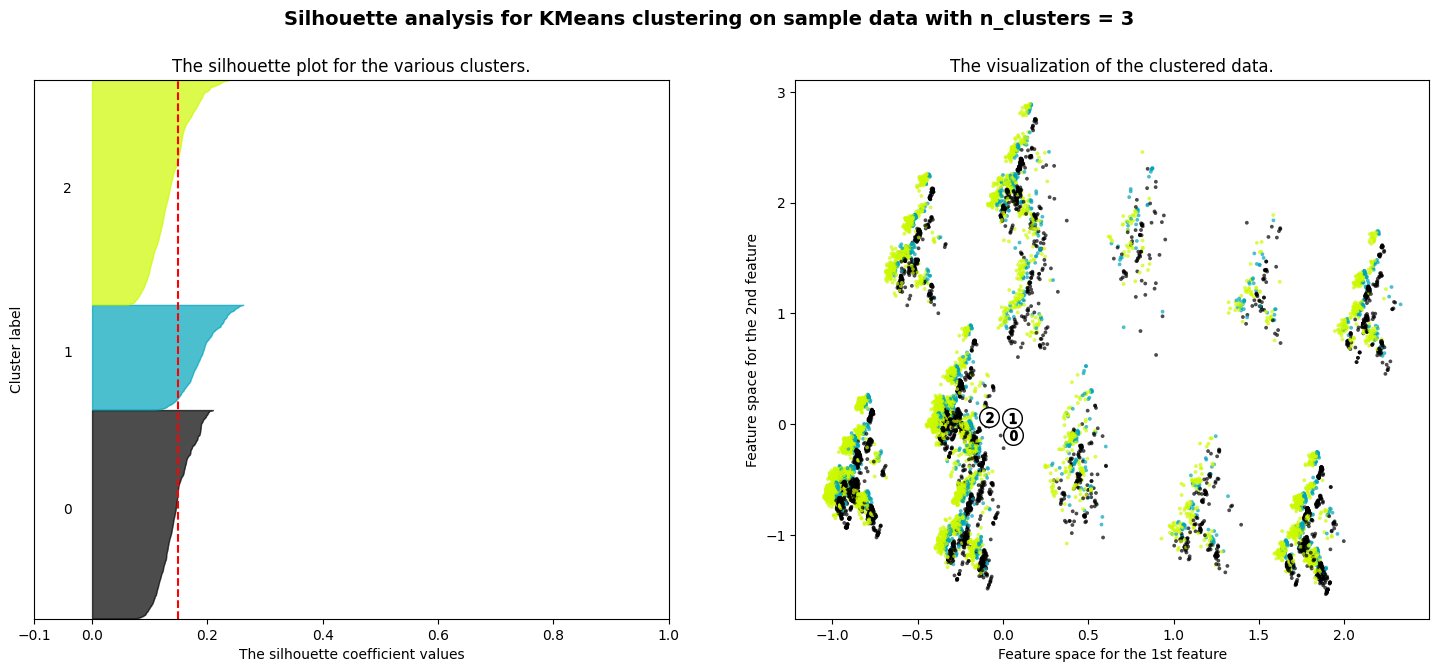

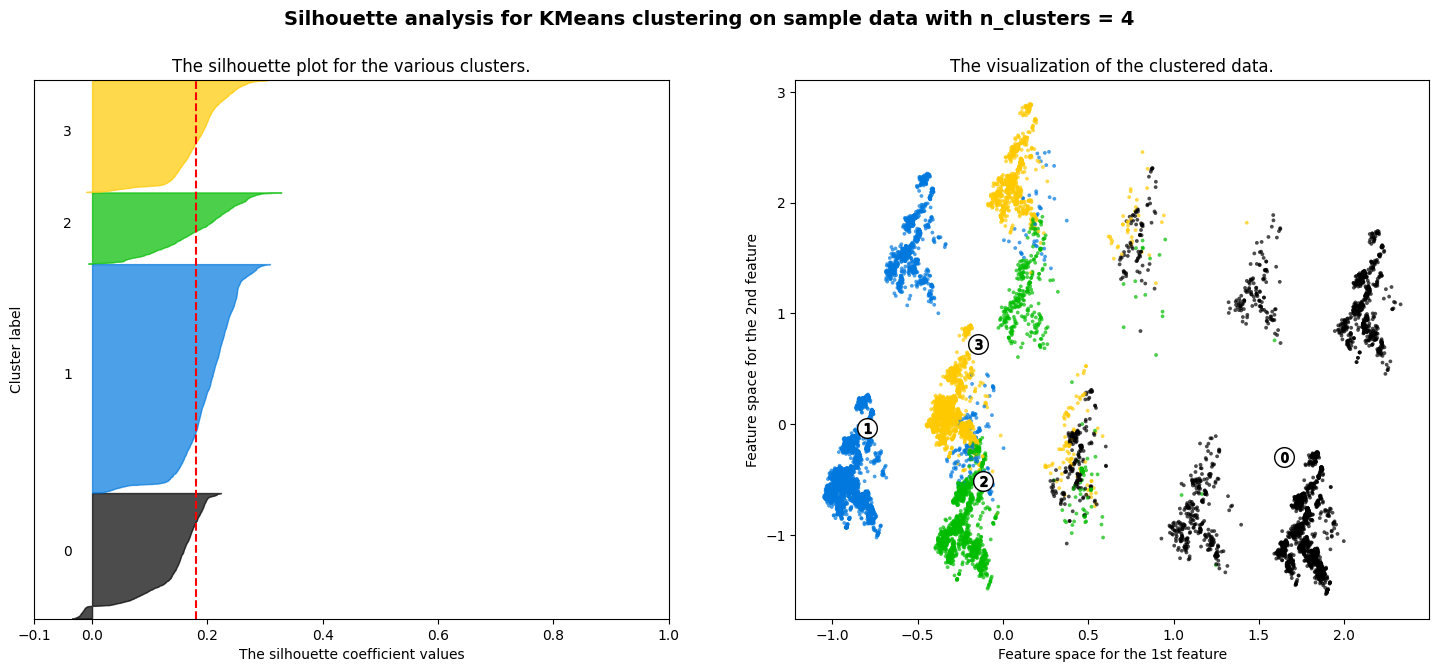

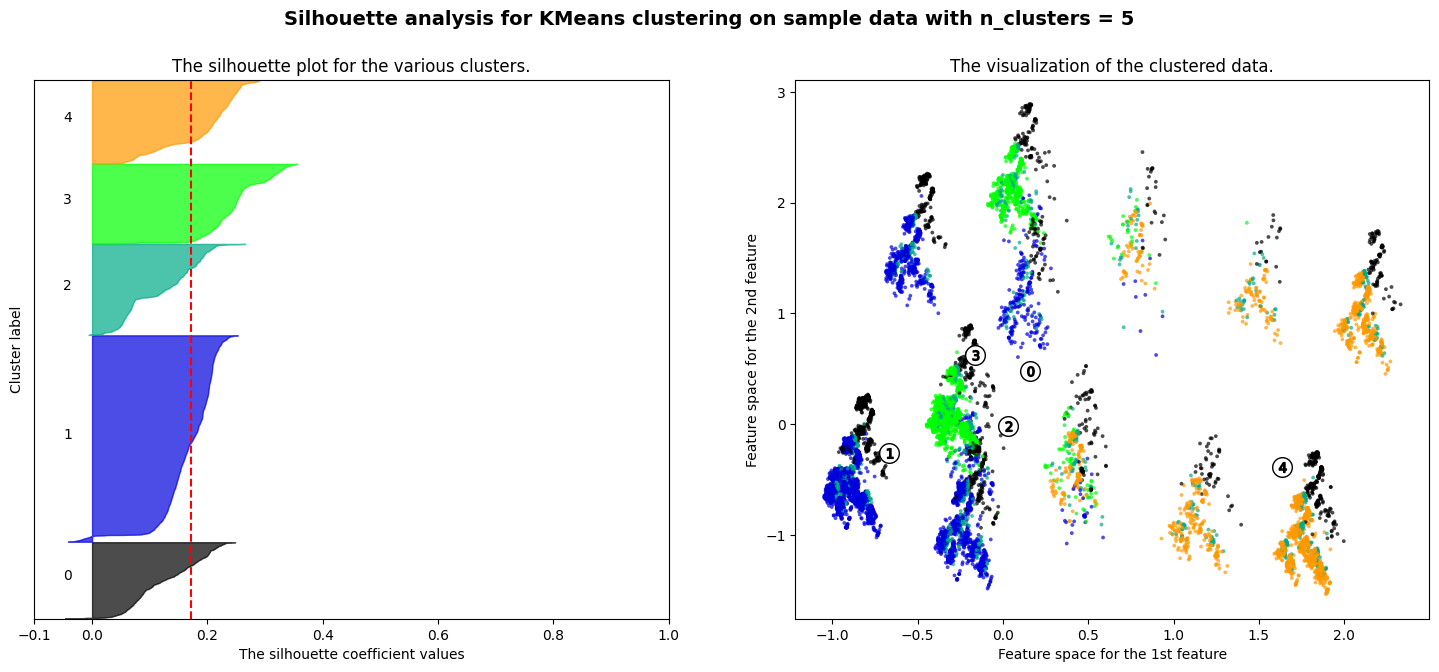

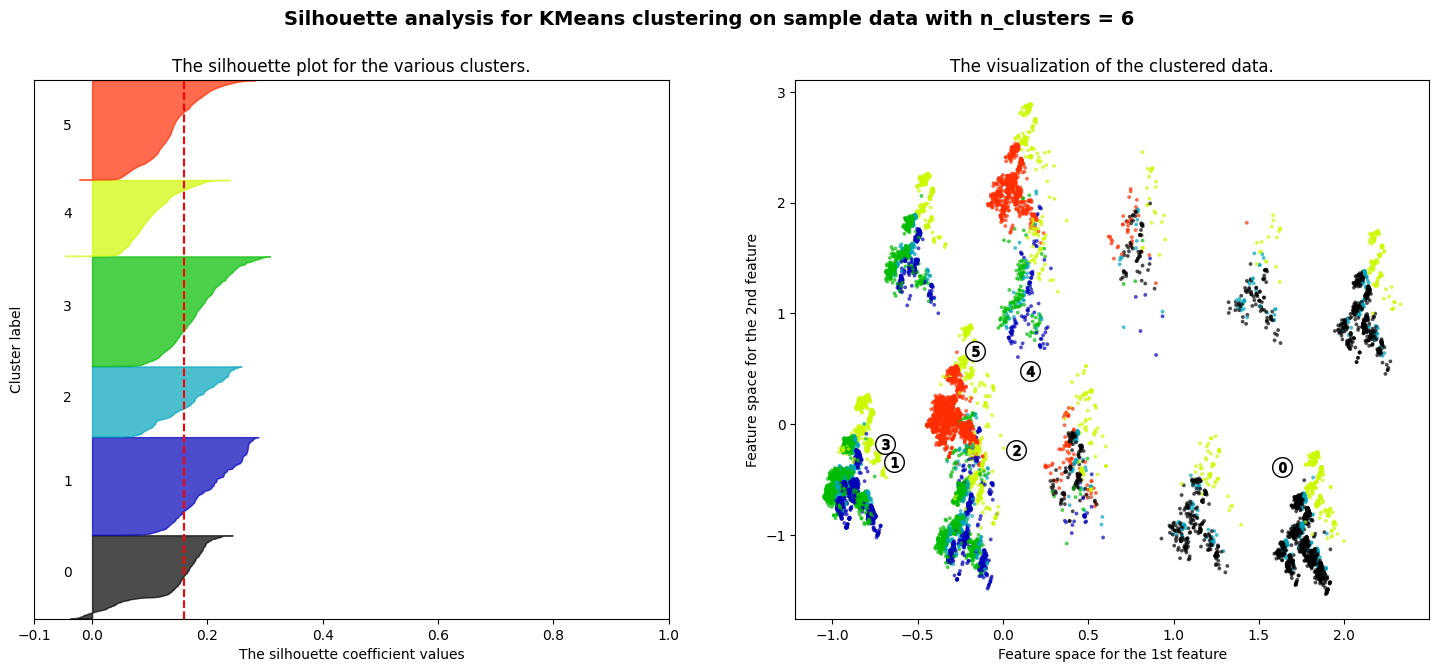

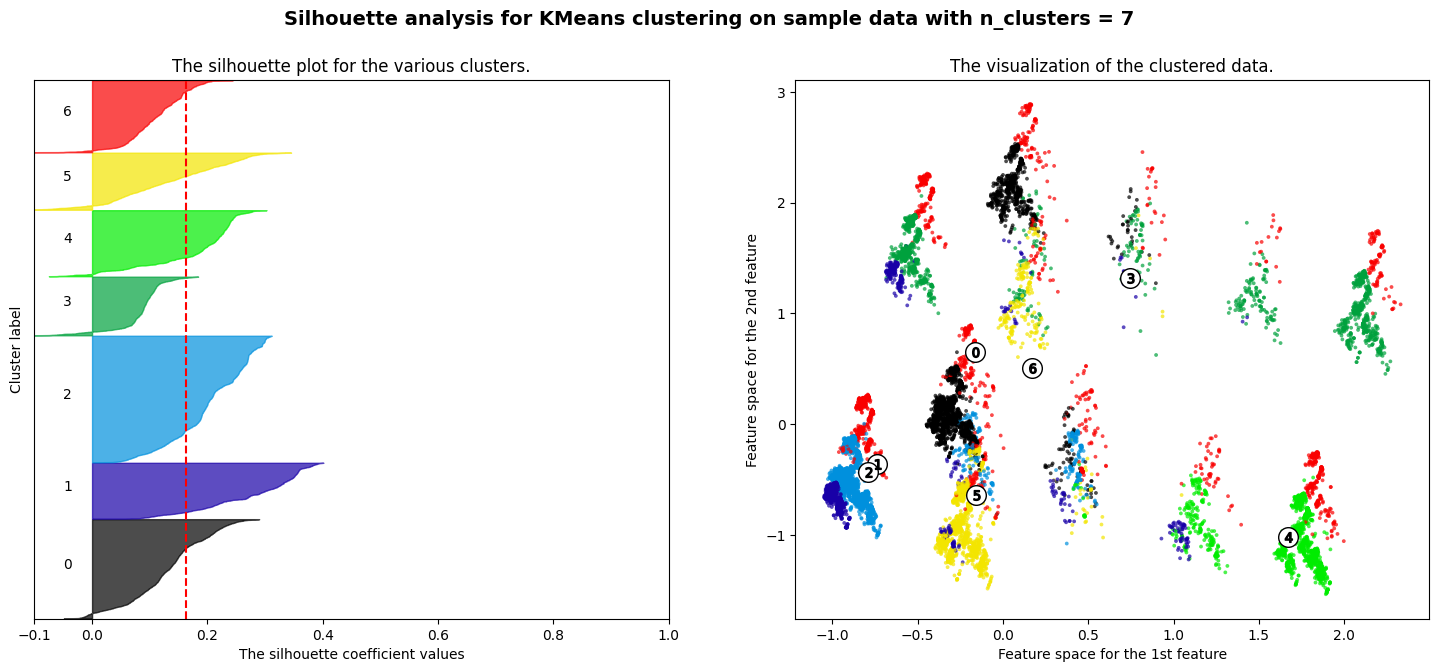

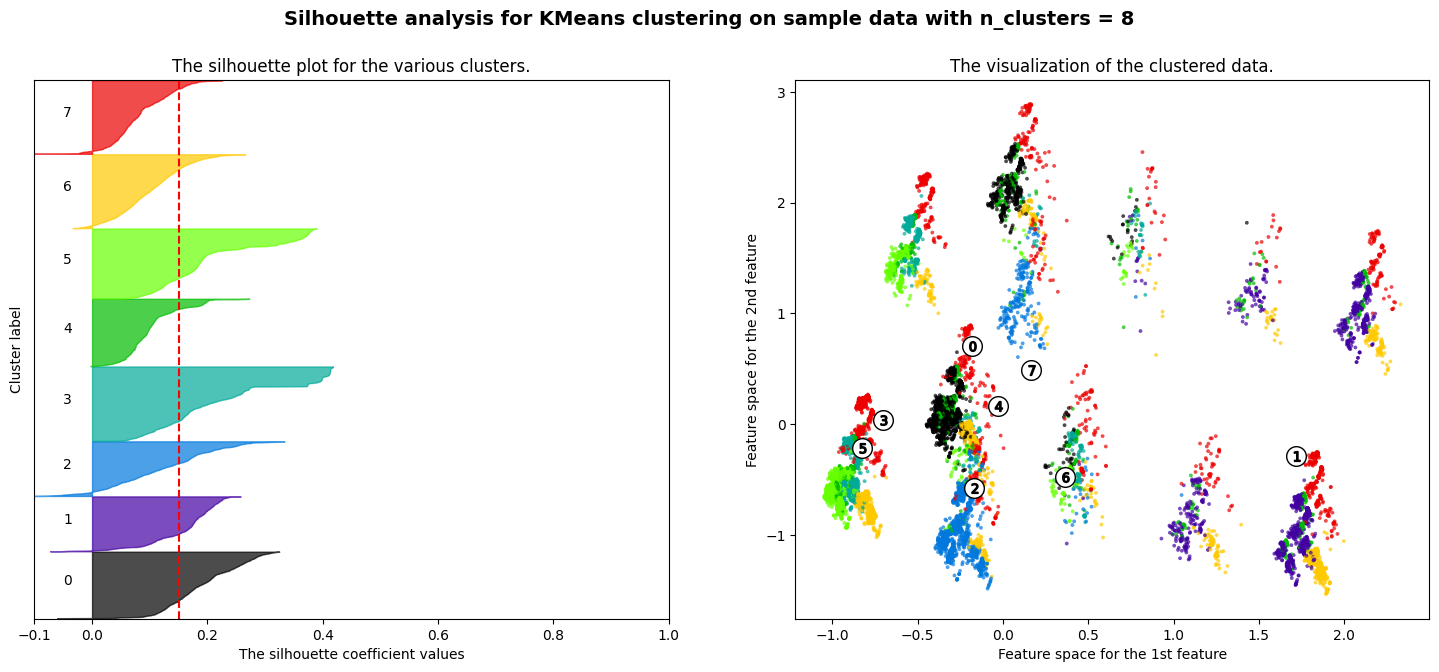

In [48]:
from utils import visualize_silhouette

visualize_silhouette(max_clusters=8, X=X_reduced)

****Discussion**: Consider the following when analysing for the optimat k-value

- Scores << average silhouette score = unacceptable
- Negative scores = assigned to wrong clusters
- Scores near 0 = close to decision boundary

Given the criteria above, all plots above contain only positive values and low silhouette scores (significantly << 1). Thus my judgment is based on a comparison of the average silhoutte scores for 

{`k=4` : `0.1797`, `k=5` : `0.1708`}; I think `k=4` is the better option because we get neighboring clusters of similar sizes and even distribution

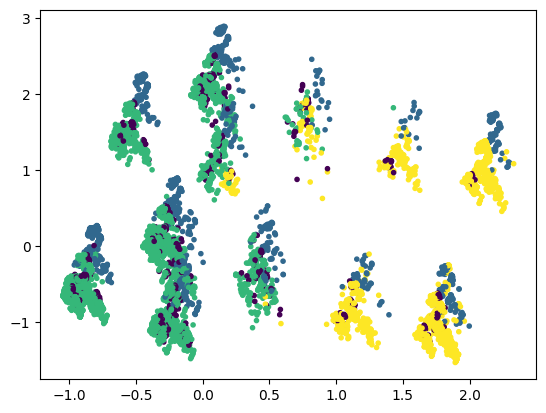

In [49]:

from sklearn.cluster import SpectralClustering
import numpy as np

sc = SpectralClustering(n_clusters=4, assign_labels="discretize",
                        random_state=42).fit(X_reduced)

fig, ax = plt.subplots()
ax.scatter(X_reduced[:,0], X_reduced[:,1], s=9, c=sc.labels_)
plt.show() ;



In [50]:
# Let's try with 4 clusters 

km = KMeans(n_clusters=4, random_state=0)
km.fit(X_reduced)
df_train = data.copy()
df_train["km_cluster"] = km.predict(X_reduced)


# check the size of each cluster
clusters_size = pd.DataFrame(km.labels_, columns=["cluster"]).value_counts() \
                                .reset_index().rename(columns={0:'size'}).set_index("cluster") \
                                        .sort_index()
clusters_size



clusters_size['%']=  clusters_size["size"]/len(X_reduced)
cs = clusters_size.sort_index()
print(cs)


KMeans(n_clusters=4, random_state=0)

,size
cluster,
0,1755
1,2313
2,2426
3,5836


         size         %
cluster                
0        1755  0.142336
1        2313  0.187591
2        2426  0.196756
3        5836  0.473317


In [51]:

print("% of sessions resulting in revenues by cluster: ")
df_train.groupby("km_cluster")["Revenue"].mean()


% of sessions resulting in revenues by cluster: 


km_cluster
0    0.249573
1    0.099870
2    0.127370
3    0.159356
Name: Revenue, dtype: float64

In [52]:

grouped_revenue = df_train[df_train['Revenue']==1].groupby('km_cluster')

grouped_revenue.agg(
    PageValues_avg=('PageValues', 'mean'), 
    Admin_page_avg= ('Administrative', 'mean'),
    Info_page_avg= ('Informational', 'mean'),
    Prod_page_avg= ('ProductRelated', 'mean'),
    BounceRate_avg= ('BounceRates', 'mean'),
    OperatingSystems_unique= ('OperatingSystems', 'unique')
)


,PageValues_avg,Admin_page_avg,Info_page_avg,Prod_page_avg,BounceRate_avg,OperatingSystems_unique
km_cluster,,,,,,
0,40.989718,2.212329,0.280822,22.369863,0.001202,"[2, 1, 3, 4, 6, 8]"
1,17.384047,4.363636,1.047619,47.909091,0.013369,"[3, 4]"
2,22.914656,3.644013,0.993528,48.488673,0.006756,"[1, 4, 7]"
3,24.699850,3.625806,0.890323,60.362366,0.004367,"[2, 4, 6, 5]"


****Observation**:
- Cluster3 is the biggest segment and 0 is the smallest
- I would recommend the business to invest more time and resources into growing the customer base in clusters 0 given that  it contributes the highest to revenue despite being the smallest segment. 
- In addition, I would also recommend to investigate cluster3, their biggest segment that doesn't maximize in revenue.

## **Task 3. Semi-Supervised Learning (15 points)**

Consider you have training data with the Revenue attribute for records from June—September only. For all records from October—December, however, Revenue attribute is missing. Build a semi-supervised self-labeling model to estimate Revenue for the missing records in October—December and then fit your classifier. Report classification performance on February—March data set with and without the self-labeled data.

1. If you do not consider the records from October—December, generate the classification performance on test data
2. After using the self-labeled data and training data together, does the classification performance on test data improve? Discuss which metrics are most important for your conclusion.


In [53]:
df = data.copy()

In [54]:

X_train_labeled = df[df["Month"].isin([6,7,8,9])] # labeled data 
X_train_unlabeled = df[df["Month"].isin([10,11,12])] #  without labeled data 

y_train_labeled = X_train_labeled.pop("Revenue")
y_train_unlabeled = X_train_unlabeled.pop("Revenue")

X_train = pd.concat([X_train_labeled, X_train_unlabeled])
y_train = np.concatenate((y_train_labeled, y_train_unlabeled))

X_test = df[df["Month"].isin([2,3])]  # to be predicted
y_test = X_test.pop("Revenue")



In [55]:
print("labeled data samples: {} and unlabled data samples:{}". \
                     format(len(X_train_labeled),len(X_train_unlabeled)))


labeled data samples: 1601 and unlabled data samples:5274


### Classification performance without self-labeled data

In [56]:

from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


def train_classifier(X_train, X_test, y_train, y_test, scale = True) -> None:
    numeric_transformer = MinMaxScaler()
    categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False)

    if scale:
        preprocessor = ColumnTransformer(
            transformers=[
                ("num", numeric_transformer, numericalFeatures),
                ("cat", categorical_transformer, categoricalFeatures),
                        ]
                                        )    
    else:
        preprocessor = ColumnTransformer(
            transformers=[
                ("cat", categorical_transformer, categoricalFeatures),
                        ]
                                        )    
    pipe = Pipeline(
        steps=[("preprocessor", preprocessor), ("model", LogisticRegression(class_weight='balanced'))]
                   )

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print(classification_report(y_test, y_pred))
    

In [57]:
train_classifier(X_train, X_test, y_train, y_test, scale=True)

              precision    recall  f1-score   support

       False       0.99      0.80      0.89      1896
        True       0.32      0.92      0.48       195

    accuracy                           0.81      2091
   macro avg       0.66      0.86      0.68      2091
weighted avg       0.93      0.81      0.85      2091



### Build Semi-Supervised Learning model
A self-labeling model to estimate Revenue for the missing records in October—December and then fit your classifier.

In [58]:
#assign -1 to y_unlabeled data

y_train = np.concatenate((y_train_labeled, np.full(y_train_unlabeled.shape, -1))) 

In [59]:
from sklearn.semi_supervised import LabelSpreading


def train_LabelSpreading(X, y, scale=True):
    ohe = OneHotEncoder(handle_unknown='ignore',sparse = False)
    X_cat = ohe.fit_transform(X[categoricalFeatures])
    new_cat_features = ohe.get_feature_names_out(categoricalFeatures)
    
    if scale:
        scaler = MinMaxScaler()
        X_num = scaler.fit_transform(X[numericalFeatures])
    else:
        X_num = X[numericalFeatures].to_numpy()
        
    X_transformed = np.hstack([X_num, X_cat])


    label_prop_model = LabelSpreading(kernel='knn', alpha=0.01)
    label_prop_model.fit(X_transformed, y)
    semi_sup_preds = label_prop_model.transduction_[y_train_labeled.shape[0]:]
    
    return semi_sup_preds


semi_sup_preds = train_LabelSpreading(X_train, y_train, scale=True)    
semi_sup_preds


array([0, 0, 0, ..., 1, 0, 0])

In [60]:
print(classification_report(y_train_unlabeled, semi_sup_preds)) 

              precision    recall  f1-score   support

       False       0.80      0.94      0.86      4183
        True       0.27      0.09      0.13      1091

    accuracy                           0.76      5274
   macro avg       0.54      0.51      0.50      5274
weighted avg       0.69      0.76      0.71      5274



### Classification performance with self-labeled data

In [61]:
y_train = np.concatenate((y_train_labeled, semi_sup_preds)) 

train_classifier(X_train, X_test, y_train, y_test, scale=True)

              precision    recall  f1-score   support

       False       1.00      0.04      0.07      1896
        True       0.10      1.00      0.18       195

    accuracy                           0.13      2091
   macro avg       0.55      0.52      0.12      2091
weighted avg       0.92      0.13      0.08      2091

